In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada (carros/minuto)
x = np.array([10, 22, 24, 42, 37, 77, 89, 22, 63, 9])
n = np.arange(1, len(x)+1)  # Minutos (1 a 10)

In [2]:
def filtro_media_movel(x, N=5):
    y = np.zeros(len(x))
    for n in range(len(x)):
        if n >= N-1:  # Só calcula a partir do 5º minuto
            y[n] = np.mean(x[n - N + 1 : n + 1])
        else:
            y[n] = np.nan  # Valores iniciais indefinidos
    return y

y = filtro_media_movel(x, N=5)
print("Saída do filtro (média móvel):", y)

Saída do filtro (média móvel): [ nan  nan  nan  nan 27.  40.4 53.8 53.4 57.6 52. ]


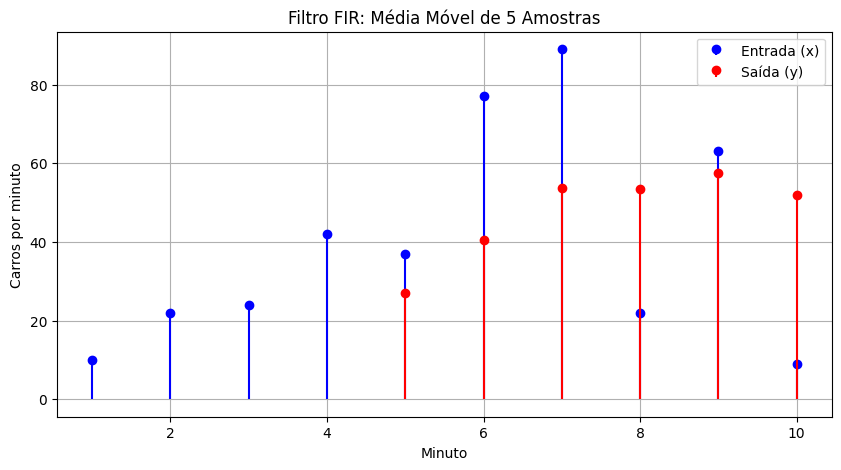

In [3]:
plt.figure(figsize=(10, 5))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt=' ', label='Entrada (x)')
plt.stem(n, y, linefmt='r-', markerfmt='ro', basefmt=' ', label='Saída (y)')
plt.xlabel('Minuto')
plt.ylabel('Carros por minuto')
plt.title('Filtro FIR: Média Móvel de 5 Amostras')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
h = np.ones(5) / 5  # Coeficientes do filtro

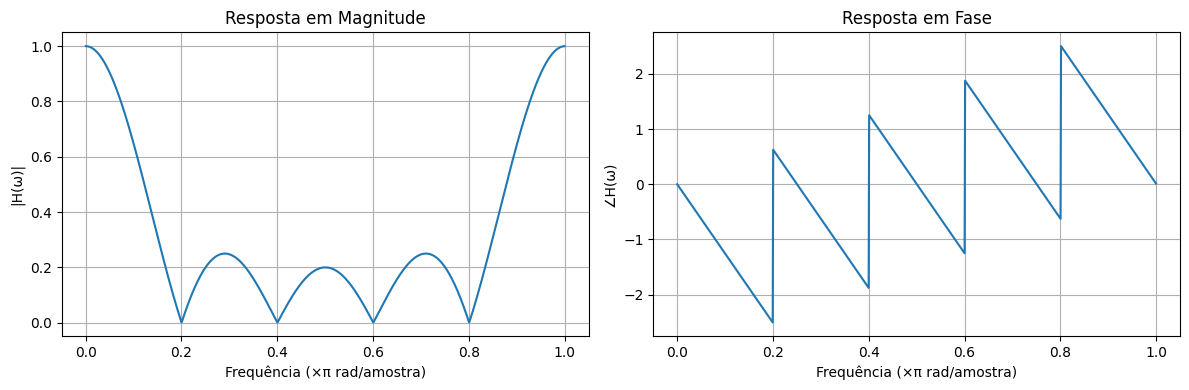

In [5]:
from scipy.fft import fft

N_fft = 1024  # Número de pontos para a DFT
H = fft(h, N_fft)  # Resposta em frequência
freq = np.linspace(0, 1, N_fft)  # Frequências normalizadas (0 a π)

plt.figure(figsize=(12, 4))

# Magnitude
plt.subplot(1, 2, 1)
plt.plot(freq, np.abs(H))
plt.title('Resposta em Magnitude')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('|H(ω)|')
plt.grid(True)

# Fase
plt.subplot(1, 2, 2)
plt.plot(freq, np.angle(H))
plt.title('Resposta em Fase')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('∠H(ω)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

M = 20  # Ordem do filtro
N = M + 1  # Número de coeficientes
omega_c = 0.2 * np.pi  # Frequência de corte

# Amostras da resposta em frequência
k = np.arange(N)
H_k = np.where(2 * np.pi * k / N <= omega_c, 1, 0)  # Passa-baixas ideal

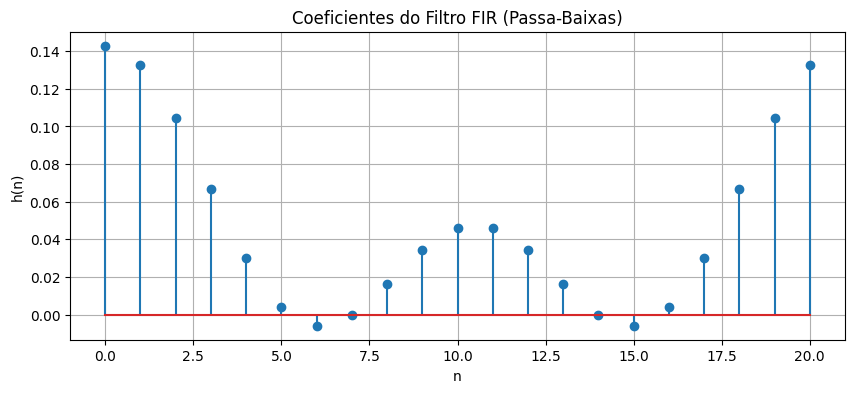

In [8]:
# IDFT para obter h(n)
h_n = np.fft.ifft(H_k).real  # Parte real (filtro FIR tem coeficientes reais)

# Plot dos coeficientes
plt.figure(figsize=(10, 4))
plt.stem(h_n)
plt.title('Coeficientes do Filtro FIR (Passa-Baixas)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid(True)
plt.show()

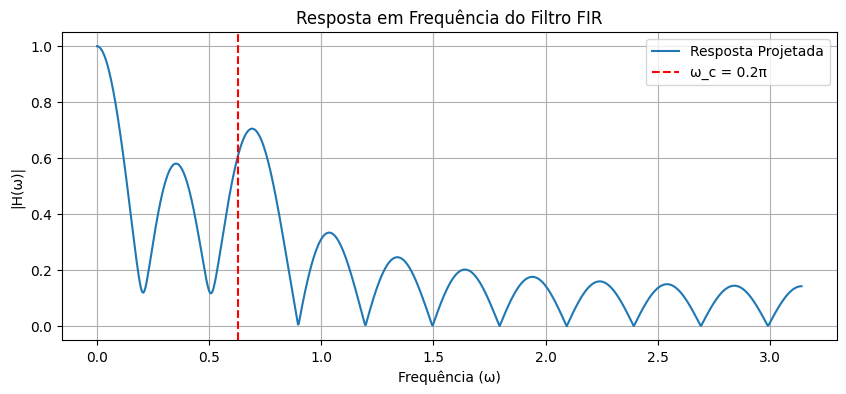

In [10]:
omega = np.linspace(0, np.pi, 1000)
H_omega = np.zeros_like(omega, dtype=complex)

for i, w in enumerate(omega):
    H_omega[i] = np.sum(h_n * np.exp(-1j * w * np.arange(N)))

# Magnitude
H_mag = np.abs(H_omega)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(omega, H_mag, label='Resposta Projetada')
plt.axvline(omega_c, color='r', linestyle='--', label='ω_c = 0.2π')
plt.title('Resposta em Frequência do Filtro FIR')
plt.xlabel('Frequência (ω)')
plt.ylabel('|H(ω)|')
plt.legend()
plt.grid(True)
plt.show()

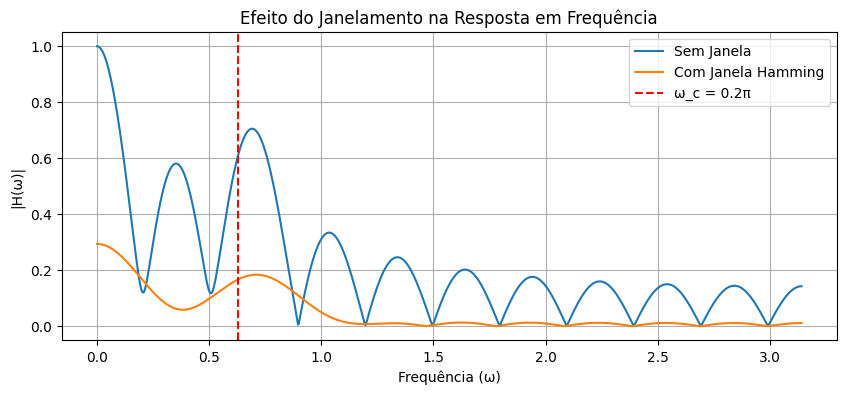

In [11]:
# Janela Hamming
window = np.hamming(N)
h_n_windowed = h_n * window

# Nova resposta em frequência
H_omega_windowed = np.zeros_like(omega, dtype=complex)
for i, w in enumerate(omega):
    H_omega_windowed[i] = np.sum(h_n_windowed * np.exp(-1j * w * np.arange(N)))

# Plot comparativo
plt.figure(figsize=(10, 4))
plt.plot(omega, H_mag, label='Sem Janela')
plt.plot(omega, np.abs(H_omega_windowed), label='Com Janela Hamming')
plt.axvline(omega_c, color='r', linestyle='--', label='ω_c = 0.2π')
plt.title('Efeito do Janelamento na Resposta em Frequência')
plt.xlabel('Frequência (ω)')
plt.ylabel('|H(ω)|')
plt.legend()
plt.grid(True)
plt.show()